# King Markov's Island-Hopping Adventure!

I know it can be disorienting to read a program if you've never programmed before, so I'm breaking it up with lots of commentary. Keep an eye out for comments (the stuff with # before it) in the code; they'll help guide you too!

So below, I'm writing comments to describe the program and give credit where credit is due. Then, I'm importing packages, stuff that other people wrote and shared, so I can easily do the math I want to do, and plot the results.

In [1]:
## King Markov's Island-Hopping Adventure
# Python adaptation of R code, pg 243 of Statistical Rethinking by Richard McElreath
# Love, Laura.

import numpy as np # Lets us easily work with arrays
import matplotlib.pyplot as plt # Lets us plot our data

## KM travels for one year
First, we set our initial values, and define the arrays where we're going to store records of position. 

In [52]:
numWeeks = 52 # There's 52 weeks in a year
positions = np.zeros(numWeeks) # Right now, the king hasn't been anywhere, so "positions" is a whole bunch of 0's.
current = 10. # The king is currently on island 10.
hT = np.array([-1, 1]) # A coin. -1 = tails, 1 = heads
numChanges = 0 #I'm interested in how many times the king moved, so I'm going to store that here.

Next, we write a for loop, that lets KM use the same decision making process each week. 

In [53]:
for i in range(0, numWeeks): # Each week...
    positions[i] = current # The king is where he is right now
    proposal = current + hT[np.random.randint(0, 2)] # flip the coin. 
    # This if/elif statement just lets us loop around from island 10 to island 1 if we have to.
    if proposal < 1.:
        proposal = 10.
    elif proposal > 10.:
        proposal = 1.
    probMove = proposal/current # Pull out our shells and stones
    decisionBag = np.random.ranf() # Load our decision bag
    if decisionBag < float(probMove): # If we should move ... 
        current = proposal # ... then move!
        numChanges = numChanges + 1 # And record that we moved!

Now, we're just gonna show all our results. First, we print the number of time KM moved; then, we print a table showing the number of times each island was visited; finally, we plot our data. 

King Markov changed position 40 times!
Island 	 Visits
5	1
6	4
7	7
8	10
9	13
10	17


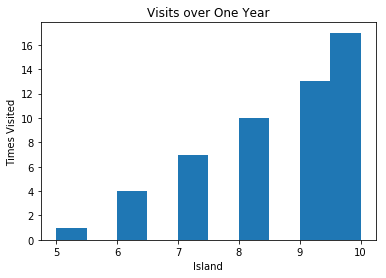

In [57]:
# Print out our interesting info: 
print("King Markov changed position " + str(numChanges) + " times!") # how many times KM moved
# Figure out each number of island visits
unique, counts = np.unique(positions, return_counts=True) 
visits = dict(zip(unique, counts))
# And print them out in a nice table
print("Island \t Visits")
for key, value in visits.iteritems():
    numVisits = int(key)
    print(str(numVisits) + '\t' + str(value))

# And now we'll just plot that out! 
plt.hist(positions)
plt.xlabel('Island')
plt.ylabel('Times Visited')
plt.title("Visits over One Year")
plt.show()

You'll notice that when you compare this graph with the one on the site, it's probably different! That's because this process is based on that initial coin-flip---it's <em>random.</em> So over a short time frame, our results can be really different!

Let's try it again over a long time frame---over 1,000 years, or 52,000 weeks, and compare this run to the one I showed on the website.

## King Markov Travels for One Millenium

All right. We've got to redefine our initial values for a new run. Everything is going to be the same except for numWeeks.

In [58]:
numWeeks = 52000 # There's 
positions = np.zeros(numWeeks) # Right now, the king hasn't been anywhere, so "positions" is a whole bunch of 0's.
current = 10. # The king is currently on island 10.
hT = np.array([-1, 1]) # A coin. -1 = tails, 1 = heads
numChanges = 0 #I'm interested in how many times the king moved, so I'm going to store that here.

Now, the Metropolis algorithm hasn't changed all of a sudden, so I'm just copying and pasting the same for-loop. Because we're running it over 52,000 weeks instead of just 52 weeks, we're going to see different results.

In [59]:
for i in range(0, numWeeks): # Each week...
    positions[i] = current # The king is where he is right now
    proposal = current + hT[np.random.randint(0, 2)] # flip the coin. 
    # This if/elif statement just lets us loop around from island 10 to island 1 if we have to.
    if proposal < 1.:
        proposal = 10.
    elif proposal > 10.:
        proposal = 1.
    probMove = proposal/current # Pull out our shells and stones
    decisionBag = np.random.ranf() # Load our decision bag
    if decisionBag < float(probMove): # If we should move ... 
        current = proposal # ... then move!
        numChanges = numChanges + 1 # And record that we moved!

Now we have new output that we need to show, so I'm going to use the same methods of printing and plotting. I'm only going to change some of the labels so our plot says we're running for 1,000 years instead of 1. 

King Markov changed position 46 times!
Island 	 Visits
2	1
3	5
4	7
5	11
6	12
7	10
8	3
9	1
10	2


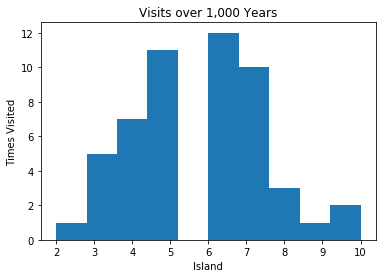

In [60]:
# Print out our interesting info: 
print("King Markov changed position " + str(numChanges) + " times!") # how many times KM moved
# Figure out each number of island visits
unique, counts = np.unique(positions, return_counts=True) 
visits = dict(zip(unique, counts))
# And print them out in a nice table
print("Island \t Visits")
for key, value in visits.iteritems():
    numVisits = int(key)
    print(str(numVisits) + '\t' + str(value))

# And now we'll just plot that out! 
plt.hist(positions)
plt.xlabel('Island')
plt.ylabel('Times Visited')
plt.title("Visits over 1,000 Years")
plt.show()

In the long run, our results are the same! That's why the Metropolis algorithm is so useful---it's super simple, and  